In [1]:
import torch

# Pytorch 기초 사용법

In [2]:
nums = torch.arange(9)
nums.shape

torch.Size([9])

In [3]:
type(nums)

torch.Tensor

In [4]:
nums.numpy()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [5]:
nums.reshape(3, 3)

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [6]:
num = torch.arange(9).reshape(3, 3)
num

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

In [9]:
num + num

tensor([[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]])

# 텐서의 생성과 변환
- 텐서는 파이토치의 가장 기본이 되는 데이터 구조와 기능을 제공하는 다차원 배열을 처리하기 위한 데이터 구조 입니다.
- API 형태는 `Numpy`의 ndarray와 비슷하며 GPU를 사용하는 계산도 지원한다.
- 텐서는 각 데이터 형태별러 정의되어 있다.
    - `torch.FloatTensor` : 32-bit float point
    - `torch.LongTensor` : 64-bit signed integer
- GPU상에서 계산을 할때는 torch.cuda.FloatTensor을 사용한다. 일반적으로 Tensor는 FloatTensor라고 생각하면 된다.
- 어떤 형태의 텐서에 상관없이 torch.tensor라는 함수로 작성할 수 있다.

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
# 2차원 형태의 list를 만들어서 텐서 생성
torch.tensor([[1, 2], [3, 4]])

tensor([[1, 2],
        [3, 4]])

In [14]:
# device를 지정하여 GPU에 텐서를 만듬
torch.tensor([[1, 2], [3, 4.]], device = "cuda:0")

tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

In [16]:
# dtype을 이용하여 텐서의 데이터 형태 지정가능
torch.tensor([[1, 2], [3, 4.]], dtype = torch.float64)

tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)

In [17]:
# arange를 이용한 1차원 텐서
torch.arange(0, 10)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
# 모든 값이 0인 3 * 5의 텐서를 작성하여 to메소드를 사용해 GPU에 전송
torch.zeros(3, 5).to("cuda:0")

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]], device='cuda:0')

In [19]:
# normal distribution으로 행렬 생성
torch.randn(3, 5)

tensor([[-1.7060,  0.9628,  0.3808, -2.2241, -0.2123],
        [-0.1785, -1.2674,  0.2534,  0.1733,  1.2188],
        [-2.3550, -0.9656, -1.5710,  1.4030, -0.3438]])

In [20]:
# Tensor의 shape은 size()로 확인
t = torch.randn(3, 5)
t.size()

torch.Size([3, 5])

- 텐서는 Numpy의 ndarray로 쉽게 변환가능
- 주의!!!!!, GPU상의 텐서는 그대로 변환할 수 없으며, CPU로 이동후 변환해야 한다

In [25]:
# numpy를 사용해 ndarray로 변환
t = torch.tensor([[1, 2], [3, 4.]])
print(type(t))

x = t.numpy()
print(type(x))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [30]:
# GPU 상의 텐서의 경우 to()로 CPU상의 텐서로 변환한 뒤 ndarray로 변환해야 한다.
t = torch.tensor([[1, 2], [3, 4.]], device="cuda:0")
print(t, type(t))

x = t.to("cpu").numpy()
print(x, type(x))

tensor([[1., 2.],
        [3., 4.]], device='cuda:0') <class 'torch.Tensor'>
[[1. 2.]
 [3. 4.]] <class 'numpy.ndarray'>


- `torch.linspace(start, end, step)` : 시작과 끝을 포함하고 step의 개수만큼 원소를 가진 등차수열을 생성함
- torch에서 바로 이런 값들을 만들면 torch 내부적으로도 사용할 수 있지만 numpy와 호환되는 라이브러리에도 사용가능하다

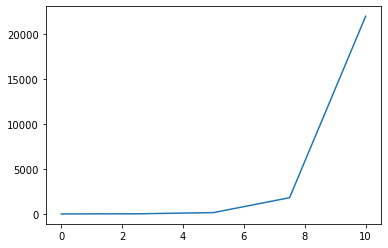

In [33]:
x = torch.linspace(0, 10, 5)
y = torch.exp(x)

plt.plot(x.numpy(), y.numpy())

# Tensor의 인덱스 조작
- 인덱스의 경우 Numpy와 같이 조작하는 것이 가능하다. 배열처럼 인덱스를 바로 지정 가능하고 슬라이스, 마스크 배열을 사용할 수 있다.

In [40]:
t = torch.tensor([
    [1, 2, 3], [4, 5, 6]
])
# index 접근
print(t[0, 2])
# slice로 접근 
print(t[:, :2])
# 마스크 배열을 이용해 True값만 추출
print(t[t > 3])
# 슬라이스를 이용해 일괄 대입
t[:, 1] = 10
print(t)
# 마스크 배열을 사용해 일괄 대입
t[t > 5] = 20
print(t)

tensor(3)
tensor([[1, 2],
        [4, 5]])
tensor([4, 5, 6])
tensor([[ 1, 10,  3],
        [ 4, 10,  6]])
tensor([[ 1, 20,  3],
        [ 4, 20, 20]])


# Tensor Operation
- Tensor는 Numpy의 ndarray와 같이 다양한 수학 연산이 가능하며 GPU를 사용할 시 더 빠른 연산이 가능하다.
- 텐서에서의 사칙연산은 같은 타입의 텐서 간 또는 텐서와 파이썬의 스칼라 값 사이에서만 가능하다.
    - 타입이 다르면 텐서간의 연산이어도 연산이 되지 안는다. FloatTensor, DoubleTensor간의 사칙 연산은 오류가 발생한다
- 스칼라 값을 연산할 때는 기본적으로 `Broadcasting`이 적용된다.

In [42]:
v = torch.tensor([1, 2, 3.])
w = torch.tensor([0, 10, 20])

m = torch.tensor([
    [0, 1, 2], [100, 200, 300.]
])

v2 = v + 10
print(v2)

v2 = v ** 2
print(v2)

z = v - w
print(z)

u = 2 * v - w / 10 + 6.0
print(u)

m2 = m * 2.0 # 행렬과 스칼라의 곱
print(m2)

print(m + v)

print(m + m)

tensor([11., 12., 13.])
tensor([1., 4., 9.])
tensor([  1.,  -8., -17.])
tensor([ 8.,  9., 10.])
tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])
tensor([[  1.,   3.,   5.],
        [101., 202., 303.]])
tensor([[  0.,   2.,   4.],
        [200., 400., 600.]])


# 텐서의 차원 조작
- 텐서의 차원을 변경하는 `view`나 텐서를 결합하는 `stack`, `cat`, 차원을 교환하는 `t', `transpose`도 사용 가능
- view의 경우 reshape과 동일한 역할 (추천 : reshape)
- cat의 경우 다른 길이의 텐서를 하나로 묶을 때 사용됨
- transpose의 경우 행렬의 전치 외에도 차원의 순서를 변경할 때 사용된다.

In [52]:
x1 = torch.tensor([
    [1, 2], [3, 4]
])
x2 = torch.tensor([
    [10, 20, 30], [40, 50, 60.]
])

print(x1.view(4, 1))

print(x1.reshape(4, 1))

print(x1.view(-1)) # 1차원 벡터로 변형

print(x1.reshape(-1))

print(x1.view(1, -1)) # -1을 사용하면 자동 계산함

print(x1.reshape(1, -1))

print(x2.t())

print(torch.cat([x1, x2], dim=1))

# transpose(dim1, dim2)을 사용하면 dim1의 차원과 dim2의 차원을 교환한다.
hwc_img_data = torch.rand(100, 64, 32, 3)
chw_img_data = hwc_img_data.transpose(1, 2).transpose(1, 3)
# 첫번째 transpose : (100, 32, 64, 3)
# 두번째 transpose : (100, 3, 64, 32)
chw_img_data.size()

tensor([[1],
        [2],
        [3],
        [4]])
tensor([[1],
        [2],
        [3],
        [4]])
tensor([1, 2, 3, 4])
tensor([1, 2, 3, 4])
tensor([[1, 2, 3, 4]])
tensor([[1, 2, 3, 4]])
tensor([[10., 40.],
        [20., 50.],
        [30., 60.]])
tensor([[ 1.,  2., 10., 20., 30.],
        [ 3.,  4., 40., 50., 60.]])


torch.Size([100, 3, 64, 32])

# Tensor 생성
- Tensor를 생성할 때 대표적으로 사용하는 함수가 `rand, zeros, ones`이다. 이 때 첫 인자는 dimension이다.

In [53]:
import torch
x = torch.rand(2, 3)
print(x)

tensor([[0.0778, 0.4926, 0.7533],
        [0.6035, 0.5240, 0.7936]])


In [56]:
# 순열 생성
torch.torch.randperm(6) # 0과 n사이 값으로 n개의 순열을 생성

tensor([1, 3, 0, 5, 2, 4])

In [60]:
zeros = torch.zeros(2, 3)
print(zeros)
torch.zeros_like(zeros) # zeros_like and ones_like의 경우 인자로 받은 데이터의 크기와 똑같이 0 혹은 1로 채워진 값을 생성

tensor([[0., 0., 0.],
        [0., 0., 0.]])


tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [61]:
print(torch.ones(2, 3))

ones = torch.randn(3, 4)
torch.ones_like(ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

- arange를 이용한 Tensor 생성
- `torch.arange(start, end, step)`

In [62]:
torch.arange(0, 3, step=0.5)

tensor([0.0000, 0.5000, 1.0000, 1.5000, 2.0000, 2.5000])

# Tensor 데이터 타입

In [63]:
# 2행 3열의 Float 타입의 Tensor 생성
torch.cuda.FloatTensor(2, 3)

tensor([[1., 2., 3.],
        [4., 0., 0.]], device='cuda:0')

In [64]:
# 리스트를 입력해서 특정 리스트를 Tensor로 변환하기
torch.cuda.FloatTensor([2, 3])

tensor([2., 3.], device='cuda:0')

In [65]:
# float type을 int type으로 형 변환
x = torch.cuda.FloatTensor([2, 3])
x.type_as(torch.cuda.IntTensor())

tensor([2, 3], device='cuda:0', dtype=torch.int32)

In [67]:
print(torch.cuda.FloatTensor([2, 3])) # GPU Tensor
print(torch.FloatTensor([2, 3])) # CPU Tensor

tensor([2., 3.], device='cuda:0')
tensor([2., 3.])


# Numpy to Tensor or Tensor to Numpy

In [68]:
import torch
import numpy as np

In [69]:
x1 = np.ndarray(shape=(2, 3), dtype = int, buffer=np.array([1, 2, 3, 4, 5, 6]))
x1

array([[1, 2, 3],
       [4, 5, 6]])

In [70]:
torch.from_numpy(x1)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [71]:
x2 = torch.from_numpy(x1)
x2.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [72]:
x2.float()

tensor([[1., 2., 3.],
        [4., 5., 6.]])

# CPU type과 GPU type의 Tensor

In [73]:
x = torch.FloatTensor([[1, 2, 3], [4, 5, 6]])
x_gpu = x.cuda()
x_gpu

tensor([[1., 2., 3.],
        [4., 5., 6.]], device='cuda:0')

In [74]:
x_cpu = x_gpu.cpu()
x_cpu

tensor([[1., 2., 3.],
        [4., 5., 6.]])

tensor([0, 2])